# Results

We will present the results of the metrics in this notebook.

In [1]:
from json import load
from os.path import join
import numpy as np

In [2]:
def convert_to_float(data):
    return np.array([float(val) for val in data])

def present_values(folder, params=None):
    for beat in ['initial', 'mid', 'final']:
        path_to_results = join(folder, f"{beat}_saliency_map_metrics.json")
        with open(path_to_results, 'r') as file:
            sal_initial = load(file)
        values = convert_to_float(sal_initial['values'])
        if params is not None:
            values = values[np.where(values != params)]
        print(f"Mean value of {beat} beat: {np.nanmean(values)*100:.2f} +- {np.nanstd(values)*100:.2f}%")

def present(folder, params=None):
    for beat in ['initial', 'mid', 'final']:
        path_to_results = join(folder, f"{beat}_saliency_map_metrics.json")
        with open(path_to_results, 'r') as file:
            sal_initial = load(file)
        values = convert_to_float(sal_initial['values'])
        if params is not None:
            values = values[np.where(np.array(sal_initial[params[0]]) == params[1])]
        print(f"Mean value of {beat} beat: {np.nanmean(values)*100:.2f} +- {np.nanstd(values)*100:.2f}%")

## Sum of the ROI divided by the Total sum

In [3]:
folder = "../../XAI_metrics/metrics/no_grid"

### Saliency Maps

#### All Values

In [4]:
values = present_values(folder)
np.where(values != 0)

Mean value of initial beat: 6.07 +- 14.46%
Mean value of mid beat: 2.50 +- 5.64%
Mean value of final beat: 7.10 +- 13.25%


(array([0]),)

#### All But 0's

In [5]:
present_values(folder, 0)

Mean value of initial beat: 27.93 +- 18.75%
Mean value of mid beat: 10.18 +- 7.14%
Mean value of final beat: 28.40 +- 9.85%


#### Correct Classification

In [6]:
present(folder, ['pred_results', 'ok'])

Mean value of initial beat: 5.62 +- 13.79%
Mean value of mid beat: 2.36 +- 5.35%
Mean value of final beat: 6.86 +- 13.02%


#### Incorrect Classification

In [7]:
present(folder, ['pred_results', 'wrong'])

Mean value of initial beat: 11.10 +- 19.83%
Mean value of mid beat: 4.49 +- 8.53%
Mean value of final beat: 10.64 +- 15.88%


#### Normal Label

In [8]:
present(folder, ['true_labels', 'normal'])

Mean value of initial beat: 4.13 +- 11.17%
Mean value of mid beat: 1.69 +- 4.02%
Mean value of final beat: 5.75 +- 11.70%


#### Abnormal Label

In [9]:
present(folder, ['true_labels', 'abnormal'])

Mean value of initial beat: 21.87 +- 24.79%
Mean value of mid beat: 9.09 +- 10.50%
Mean value of final beat: 18.06 +- 18.85%


In [1]:
from results import *

2137_0_222_ok.png


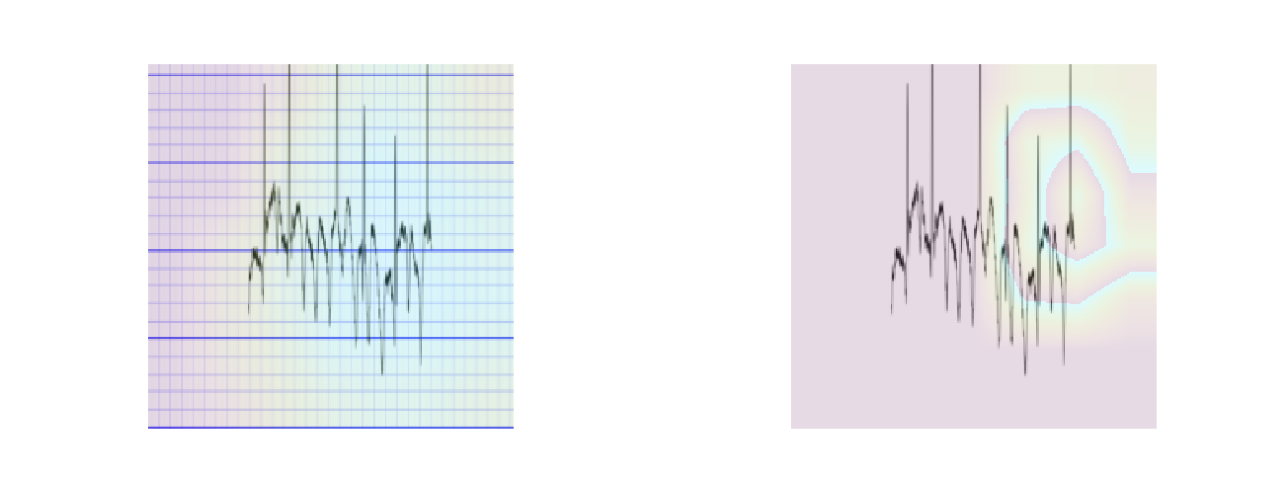

2169_0_210_ok.png


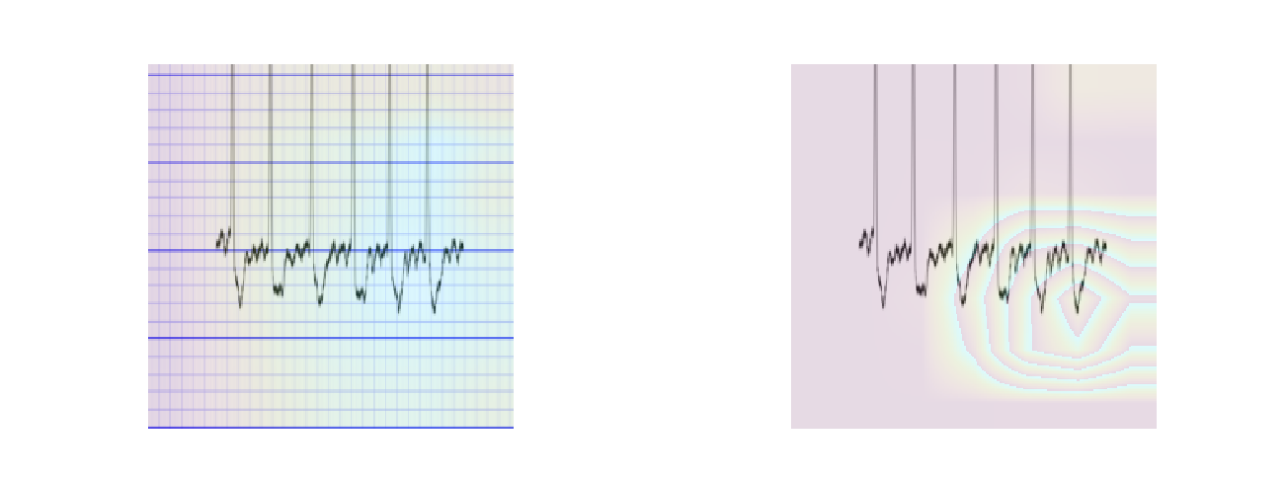

532_0_100_ok.png


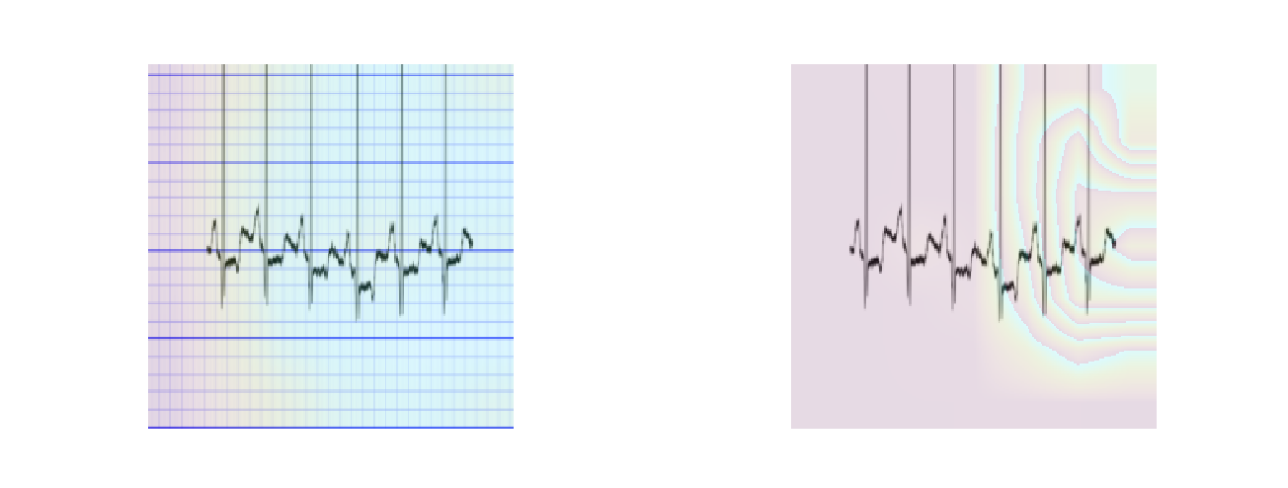

1118_0_117_ok.png


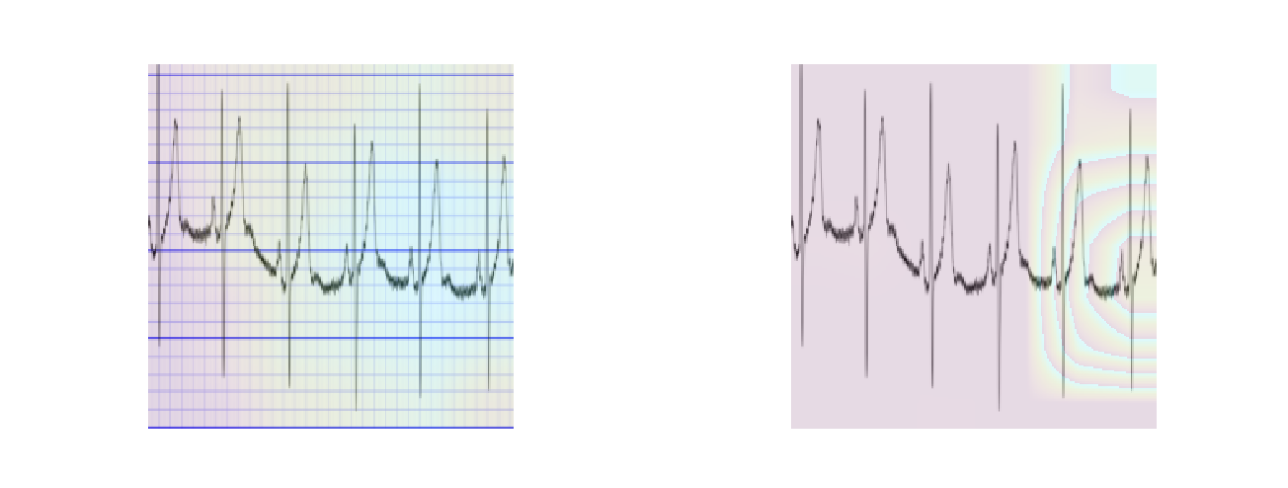

1768_0_121_ok.png


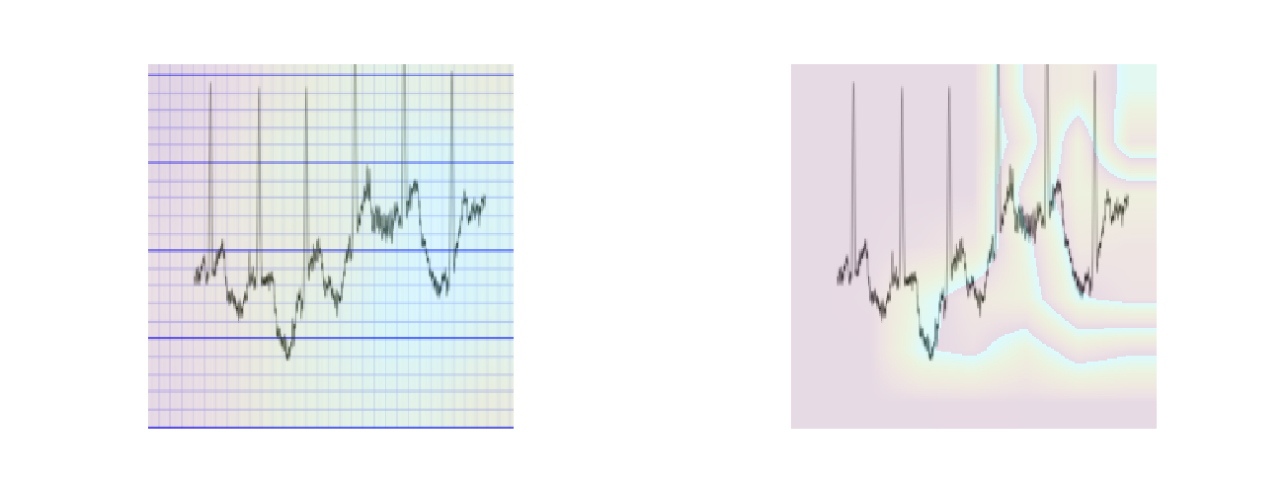

73_0_231_ok.png


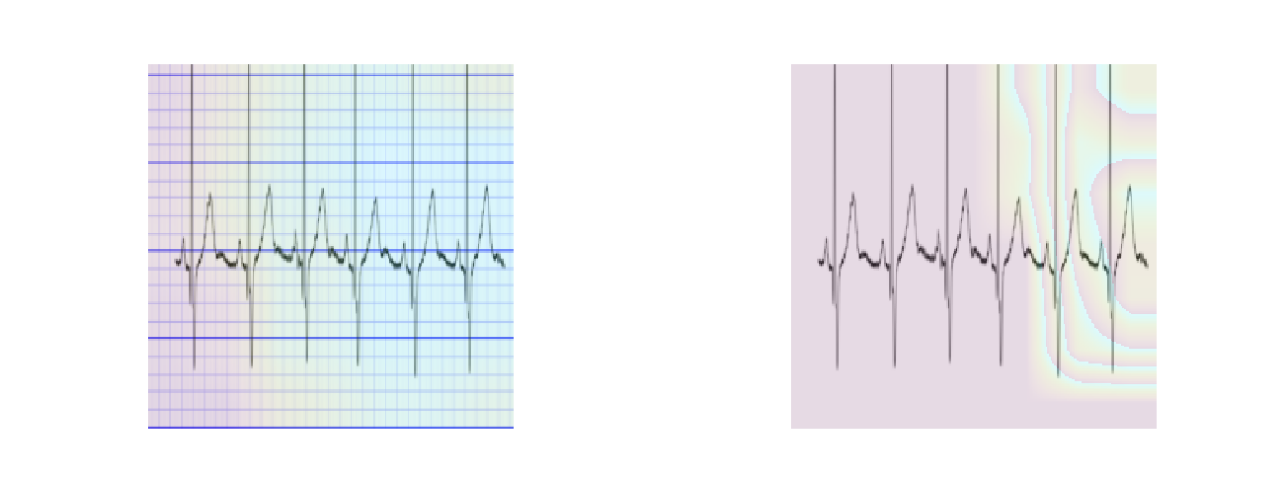

296_0_117_ok.png


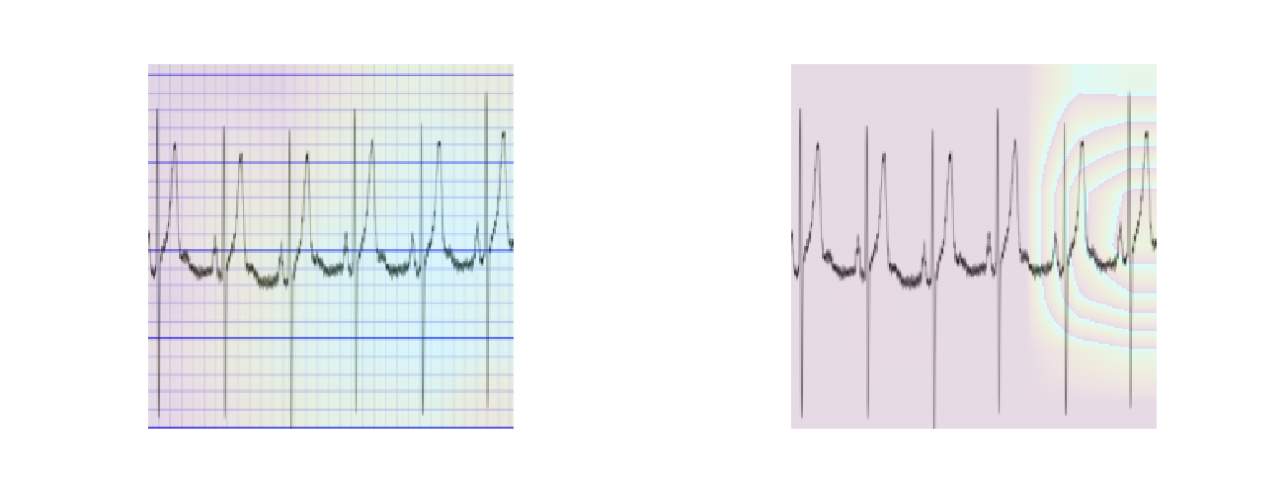

1222_0_200_ok.png


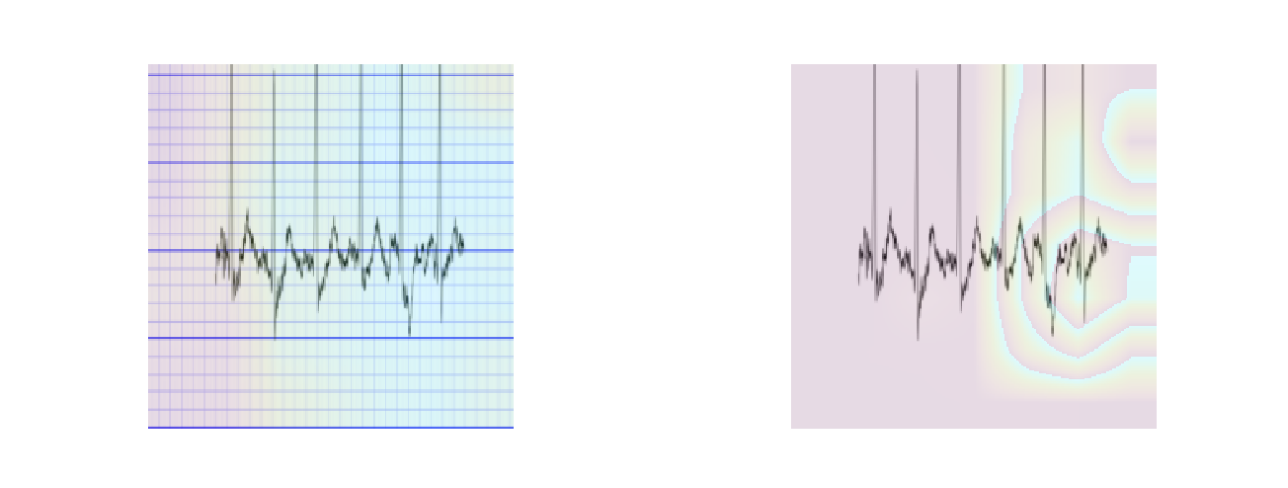

1618_0_121_ok.png


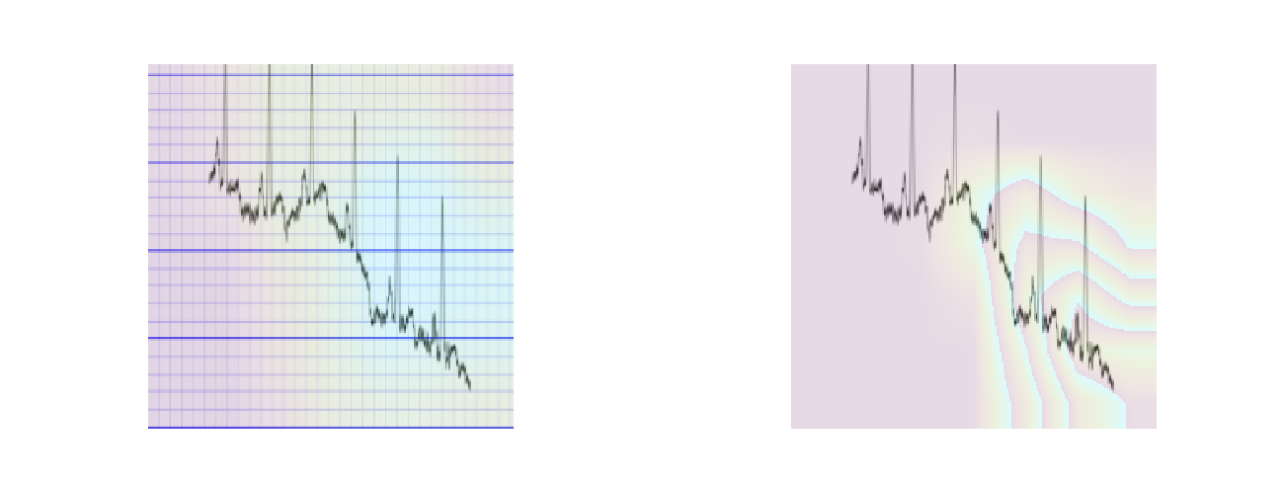

1959_0_234_ok.png


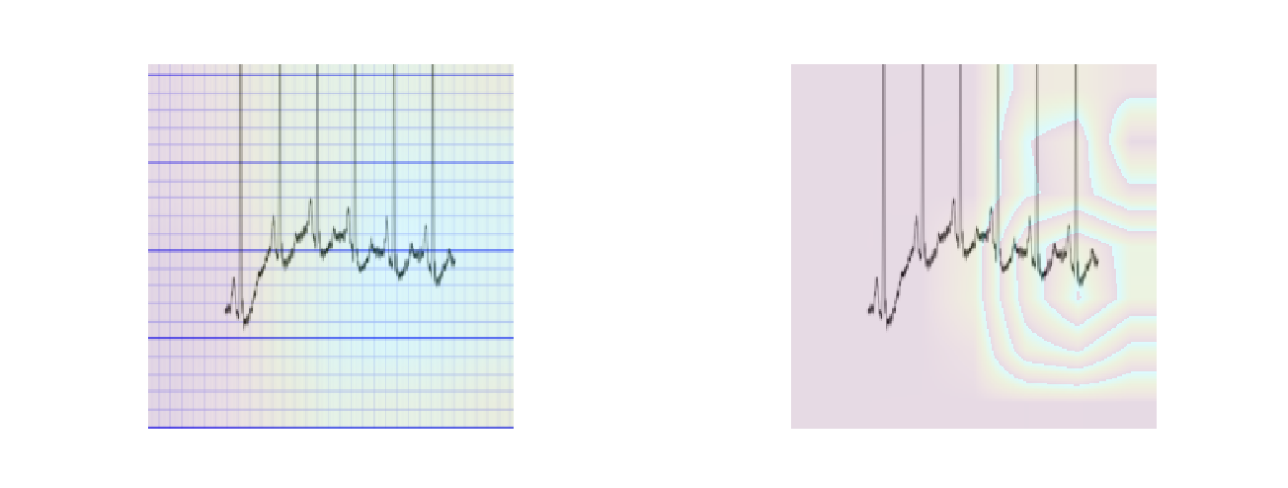

1961_0_210_ok.png


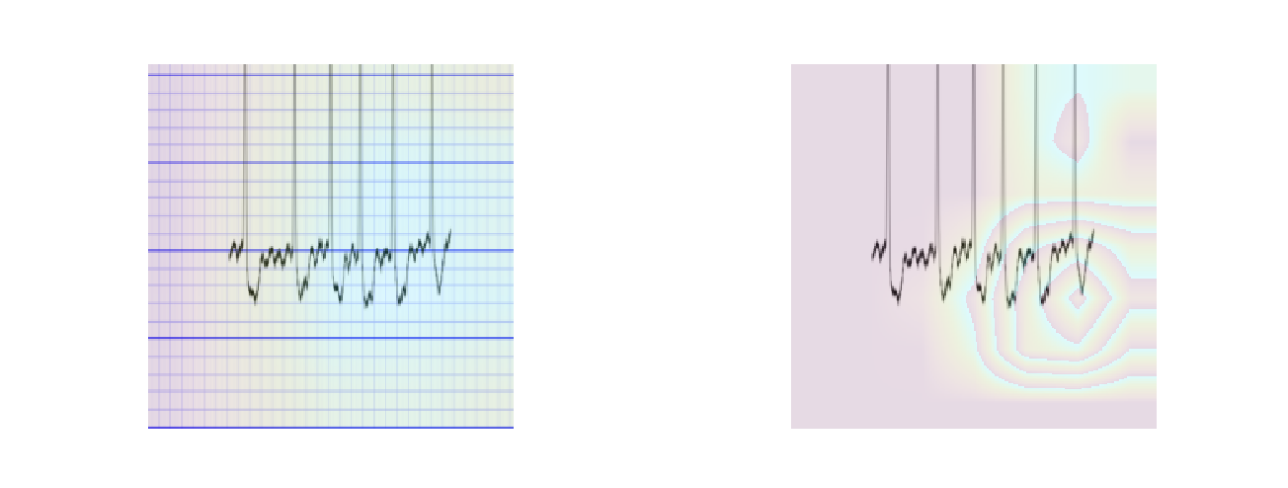

623_0_214_ok.png


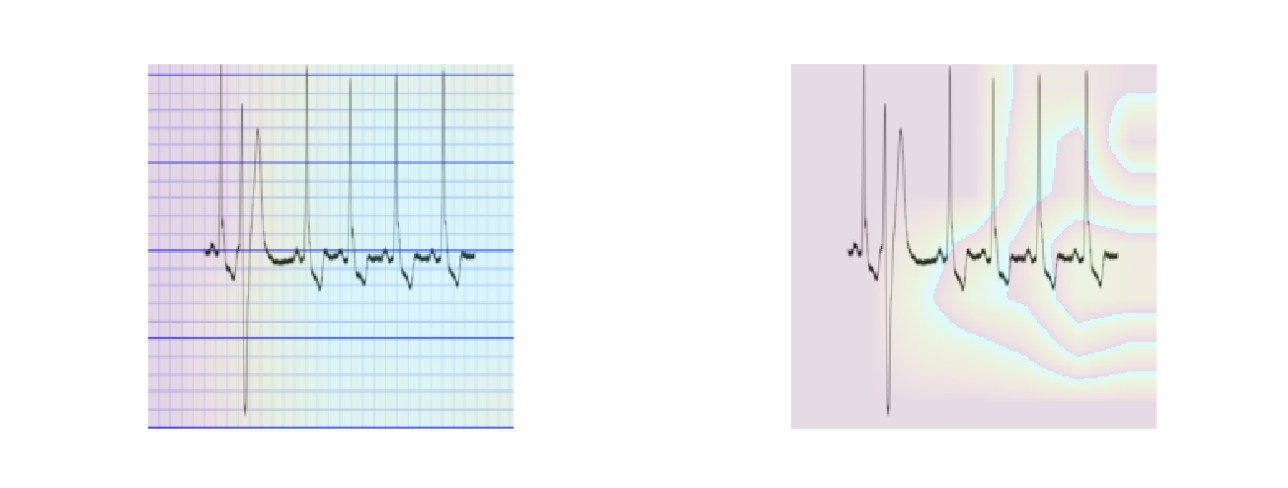

424_0_202_ok.png


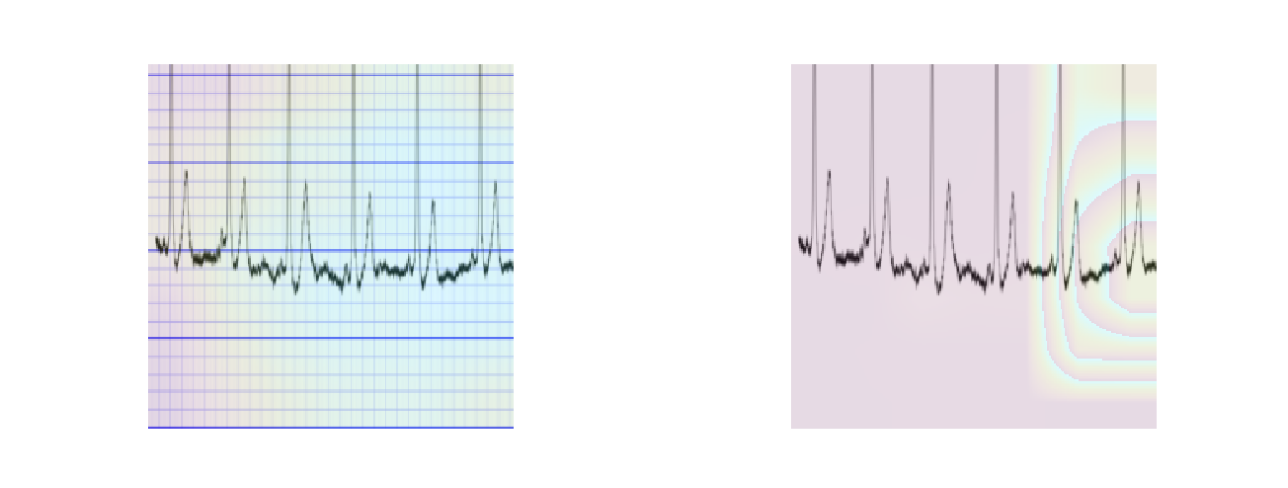

429_0_117_ok.png


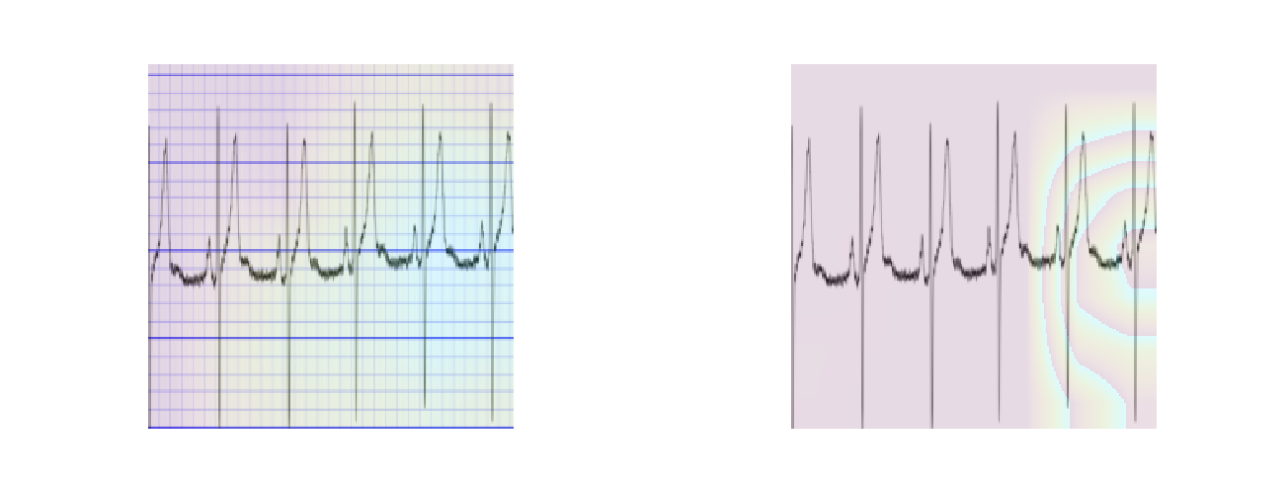

2422_0_233_ok.png


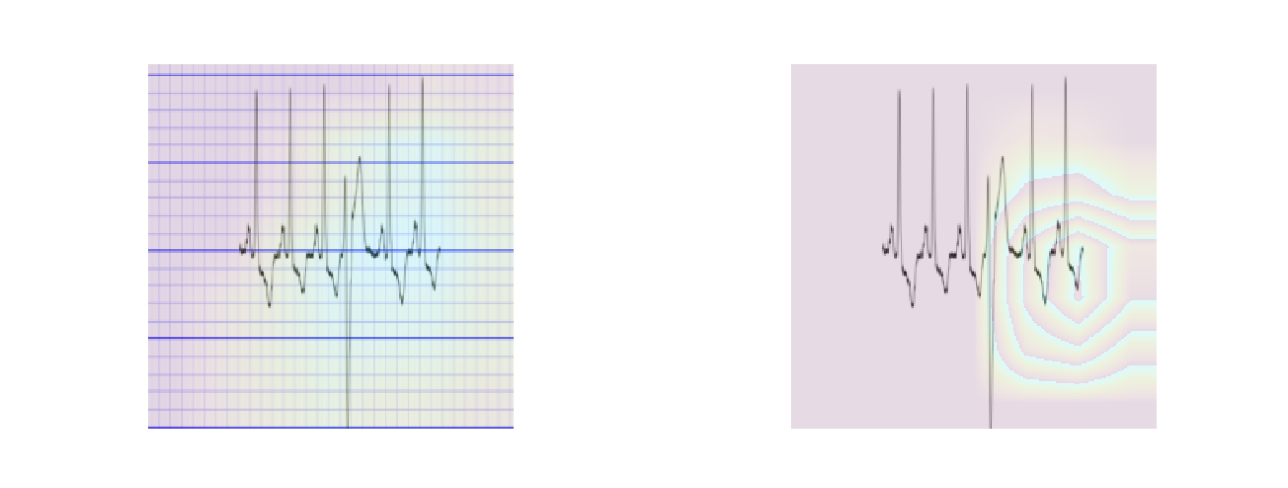

2459_0_213_ok.png


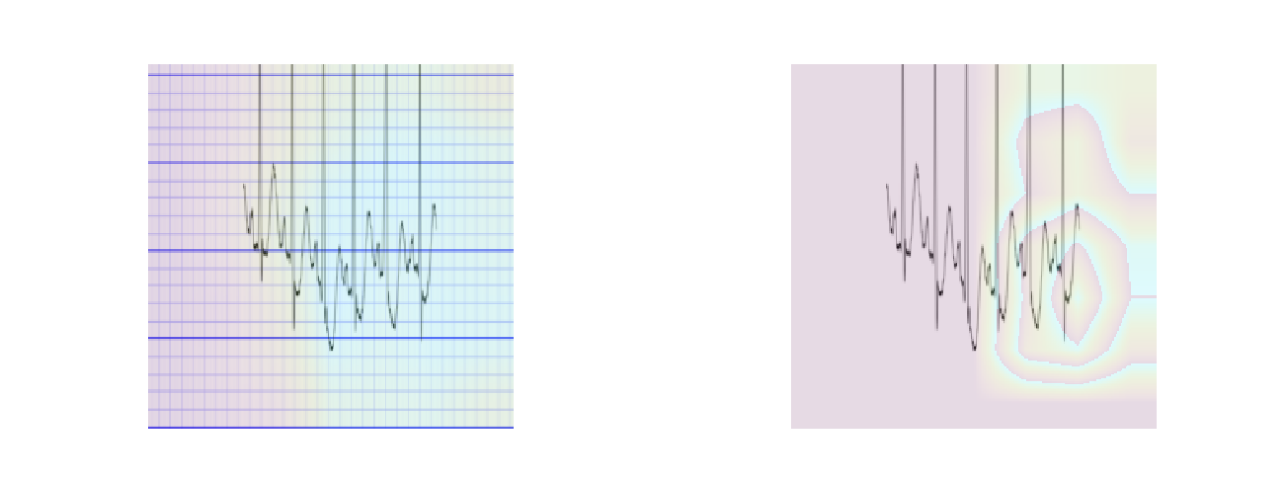

1136_0_105_ok.png


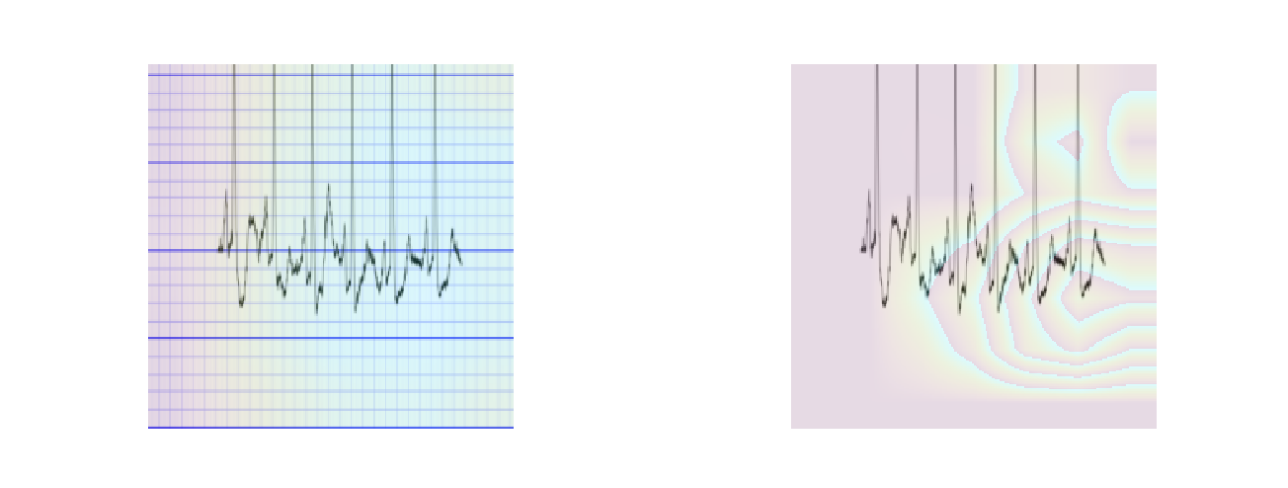

1136_0_213_ok.png


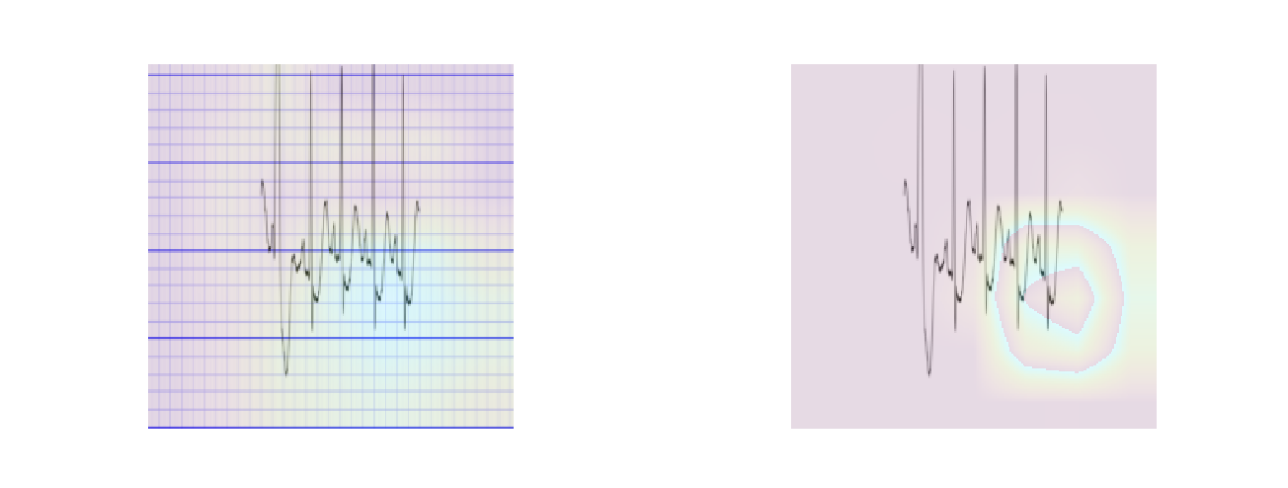

818_0_219_ok.png


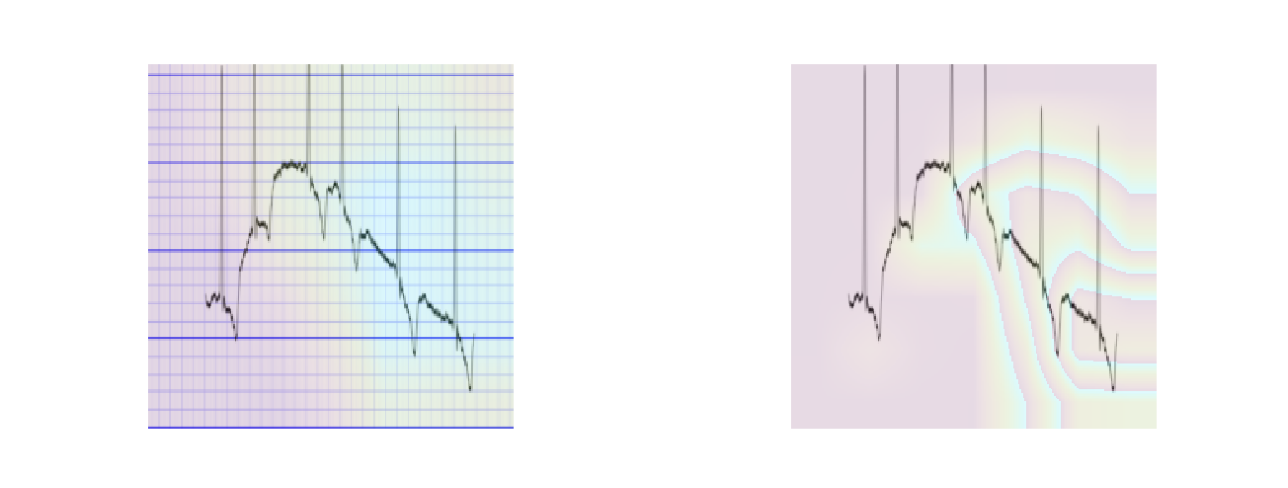

1845_0_212_ok.png


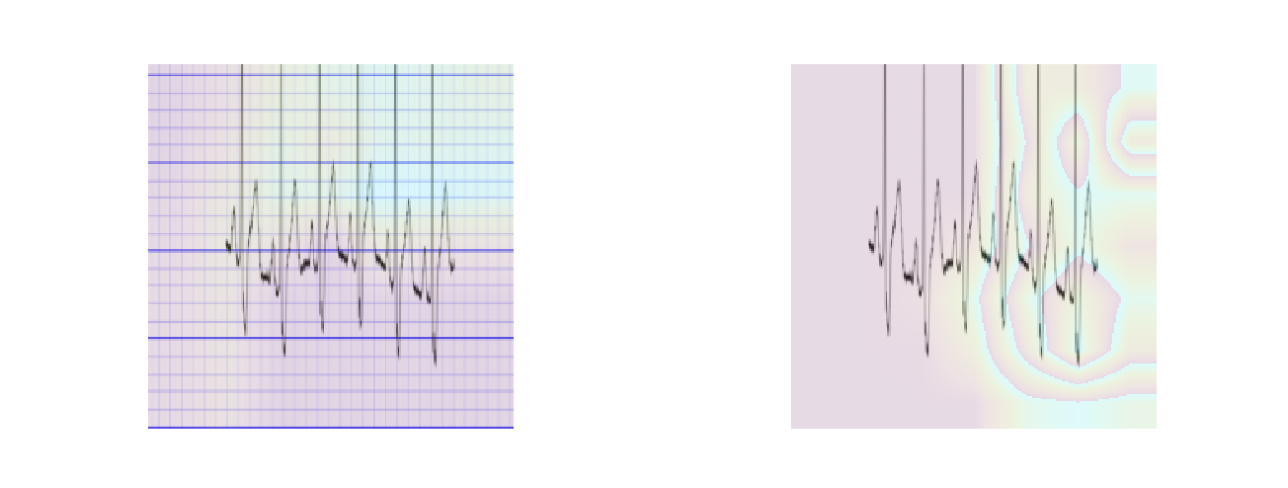

In [5]:
maps_comparison("final", "grad_cam_map", "normal")